In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_ride_share = pd.merge(city_df,ride_df,on="city",how="inner")
# Display the data table for preview
merged_ride_share.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [2]:
# Collect Urban Data
grouped_urban = merged_ride_share.groupby("city",as_index=False)
grouped_urban = grouped_urban.filter(lambda x: x.max()["type"]=="Urban")
mean_city_fare_urban = grouped_urban.groupby("city").mean().reset_index()
num_rides_city_urban = grouped_urban.groupby("city").count()
sizes_urban = grouped_urban.groupby('city').max()["driver_count"]
# Collect Suburban Data
grouped_suburban = merged_ride_share.groupby("city",as_index=False)
grouped_suburban = grouped_suburban.filter(lambda x: x.max()["type"]=="Suburban")
mean_city_fare_suburban = grouped_suburban.groupby("city").mean().reset_index()
num_rides_city_suburban = grouped_suburban.groupby("city").count()
sizes_suburban = grouped_suburban.groupby('city').max()["driver_count"]
# Collect Rural Data
grouped_rural = merged_ride_share.groupby("city",as_index=False)
grouped_rural.max()["type"]
grouped_rural = grouped_rural.filter(lambda x: x.max()["type"]=="Rural")
mean_city_fare_rural = grouped_rural.groupby("city").mean().reset_index()
num_rides_city_rural = grouped_rural.groupby("city").count()
sizes_rural = grouped_rural.groupby('city').max()["driver_count"]


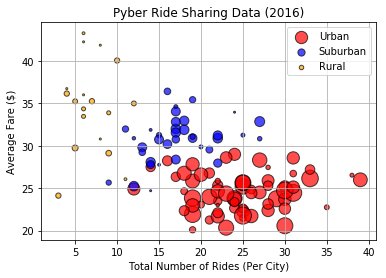

In [21]:
plt.scatter(num_rides_city_urban["ride_id"],mean_city_fare_urban["fare"],s=sizes_urban*4,color="red",edgecolors="black",alpha=0.7,label="Urban")
plt.scatter(num_rides_city_suburban["ride_id"],mean_city_fare_suburban["fare"],s=sizes_suburban*4,color="blue",edgecolors="black",alpha=0.7,label="Suburban")
plt.scatter(num_rides_city_rural["ride_id"],mean_city_fare_rural["fare"],s=sizes_rural*4,color="orange",edgecolors="black",alpha=0.7,label="Rural")
plt.legend()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.savefig("myPyderChart.png")
# Show plot
plt.show()

## Total Fares by City Type

          driver_count      fare           ride_id
type                                              
Rural              537   4327.93   580968240341287
Suburban          8570  19356.33  3106884522576766
Urban            59602  39854.38  7919412664056093


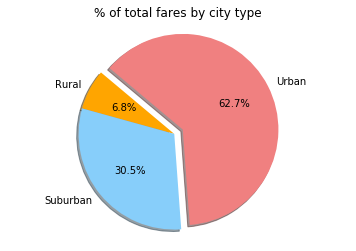

In [29]:
# Calculate Type Percents
grouped_types = merged_ride_share.groupby("type")
percent_types = grouped_types.sum()
print(percent_types)
percent_types = percent_types["fare"]/percent_types["fare"].sum()
percent_types
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["Orange","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(percent_types,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,explode=explode)
plt.axis("equal")
plt.title("% of total fares by city type")
# Save Figure
plt.savefig("myPyderFares.png")
plt.show()

## Total Rides by City Type

          city  driver_count  date  fare  ride_id
type                                             
Rural      125           125   125   125      125
Suburban   625           625   625   625      625
Urban     1625          1625  1625  1625     1625


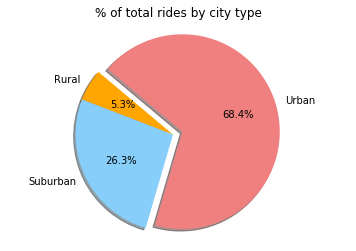

In [27]:
# Calculate Ride Percents
ride_types = grouped_types.count()
print(ride_types)
ride_types = ride_types["ride_id"]/ride_types["ride_id"].sum()
ride_types
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["Orange","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(ride_types,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,explode=explode)
plt.axis("equal")
plt.title("% of total rides by city type")
# Save Figure
plt.savefig("myPyderRides.png")
plt.show()

## Total Drivers by City Type

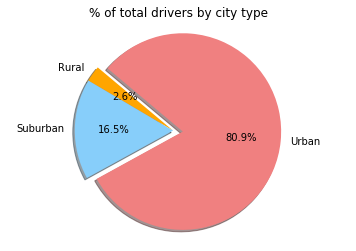

In [69]:
# Calculate Driver Percents
grouped_city_types = merged_ride_share.groupby(["type","city"],as_index =False)
rural_drivers = grouped_city_types.max()[grouped_city_types.max()["type"]=="Rural"]
suburban_drivers = grouped_city_types.max()[grouped_city_types.max()["type"]=="Suburban"]
urban_drivers = grouped_city_types.max()[grouped_city_types.max()["type"]=="Urban"]
driver_types = (rural_drivers["driver_count"].sum(),suburban_drivers["driver_count"].sum(),urban_drivers["driver_count"].sum())
driver_types
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["Orange","lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(driver_types,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,explode=explode)
plt.axis("equal")
plt.title("% of total drivers by city type")
# Save Figure
plt.savefig("myPyderDrivers.png")
plt.show()